# Decision Tree and Natural Language Processing (Sentiment Prediction)

## Penjelasan Kolom:

- Sentiment = Kategori pesan negatif/positif/netral
- Kalimat = Isi dari pesan

## A. Data Preparation

### A.1 Import Libraries

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory_stem = StemmerFactory()
stemmer = factory_stem.create_stemmer()

factory_stop = StopWordRemoverFactory()
list_stopwords = set(factory_stop.get_stop_words())

kamus_singkatan = {
    "yg": "yang", "ga": "tidak", "gak": "tidak", "kalo": "kalau", 
    "dgn": "dengan", "sdh": "sudah", "aja": "saja", "bgt": "banget",
    "dlm": "dalam", "sy": "saya", "km": "kamu", "blm": "belum",
    "krn": "karena", "jd": "jadi", "tpi": "tapi"
}

### A.2 Load Data

In [37]:
try:
    df = pd.read_csv('Corpus Bahasa Indonesia Label.csv')
    print("Berhasil membaca csv")
except Exception as e:
    print("Gagal membaca data")

Berhasil membaca csv


### A.3 Melihat 5 Data Teratas dan 5 Data Terbawah

In [38]:
df.head()

,kalimat,sentiment
0,Kalimat-kalimat tersebut adalah sebagai berikut,0
1,Manusia membutuhkan makanan dan air supaya men...,1
2,Tanaman hijau menggunakan air untuk membuat ma...,0
3,Tanaman yang tidak mendapat air akan layu dan ...,1
4,Keberhasilan belajar murid tidak hanya bergant...,1


In [39]:
df.tail()

,kalimat,sentiment
12604,Saya suka menggunakan kendaraan ini untuk perj...,1
12605,Kendaraan ini memiliki desain interior yang me...,1
12606,Kendaraan tersebut sering mengalami masalah ke...,2
12607,Saya memilih kendaraan ini karena harganya kom...,1
12608,Kendaraan ini sangat nyaman untuk perjalanan j...,2


### A.4 Melihat Informasi Data

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12609 entries, 0 to 12608
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   kalimat    12609 non-null  object
 1   sentiment  12609 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 197.1+ KB


### A.5 Melihat Dimensi Data

In [41]:
df.shape

(12609, 2)

### A.6 Cek Data Duplikat

In [42]:
df.duplicated().sum()

np.int64(1516)

In [43]:
df.drop_duplicates(inplace=True)

### A.7 Cek Data Hilang

In [44]:
df.isna().sum()

kalimat      0
sentiment    0
dtype: int64

## B. Data Preprocessing

### B.1 Cek Label

In [45]:
df['sentiment'].value_counts()

sentiment
0    5593
2    2972
1    2528
Name: count, dtype: int64

### B.2 Text Preprocessing

#### Linguistic Processing (Bahasa Indonesia)

In [46]:
def linguistic_processing_indo(list_of_words):
    clean_words = []
    for word in list_of_words:
        
        # 1. Normalisasi Singkatan
        word = kamus_singkatan.get(word, word)
        
        # 2. Stopword Removal
        if word not in list_stopwords:
            
        # 3. Stemming (Sastrawi)
            stemmed_word = stemmer.stem(word)
            
            # Cek lagi setelah distem, takutnya jadi kosong atau stopword
            if len(stemmed_word) > 1 and stemmed_word not in list_stopwords:
                clean_words.append(stemmed_word)
            
    return " ".join(clean_words)

#### Preprocess Text

In [47]:

def preprocess_text(text_series):
    # 1. Case Folding/Normalization (Jadikan huruf kecil)
    # 2. Text Cleaning (Hapus angka/simbol aneh)
    # 3. Remove Punctuation (Hapus tanda baca)
    # 4. Tokenization (Split jadi list kata)
    temp_tokens = text_series.str.lower().str.replace(r'[^a-z\s]', ' ', regex=True).str.split()
    
    # Linguistic Processing Bahasa Indonesia (Sastrawi)
    return temp_tokens.apply(linguistic_processing_indo)

df['clean_kalimat'] = preprocess_text(df['kalimat'])

In [48]:
df['clean_kalimat'].head()

0                       kalimat kalimat sebut ikut
1    manusia butuh makan air jadi kuat sehat tanam
2                       tanam hijau air buat makan
3                       tanam air layu jadi kering
4        hasil ajar murid gantung jumlah mutu guru
Name: clean_kalimat, dtype: object

## C. Exploratory Data Analysis (EDA)

### C.1 Visualisasi Label

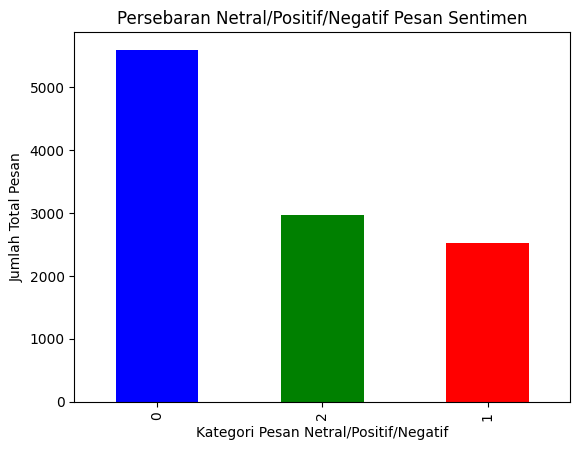

In [49]:
df['sentiment'].value_counts().plot(kind='bar', color=['blue', 'green', 'red'])
plt.title("Persebaran Netral/Positif/Negatif Pesan Sentimen")
plt.xlabel("Kategori Pesan Netral/Positif/Negatif")
plt.ylabel("Jumlah Total Pesan")
plt.show()

In [50]:
df['sentiment'].value_counts(normalize=True * 100)

sentiment
0    0.504192
2    0.267917
1    0.227891
Name: proportion, dtype: float64

In [51]:
def top_words(text_series, n=10):
    all_text = " ".join(text_series)
    word_list = all_text.split()
    top_words = pd.Series(word_list).value_counts().head(n)
    return top_words

Text(0.5, 1.0, 'Top 10 Kata Netral')

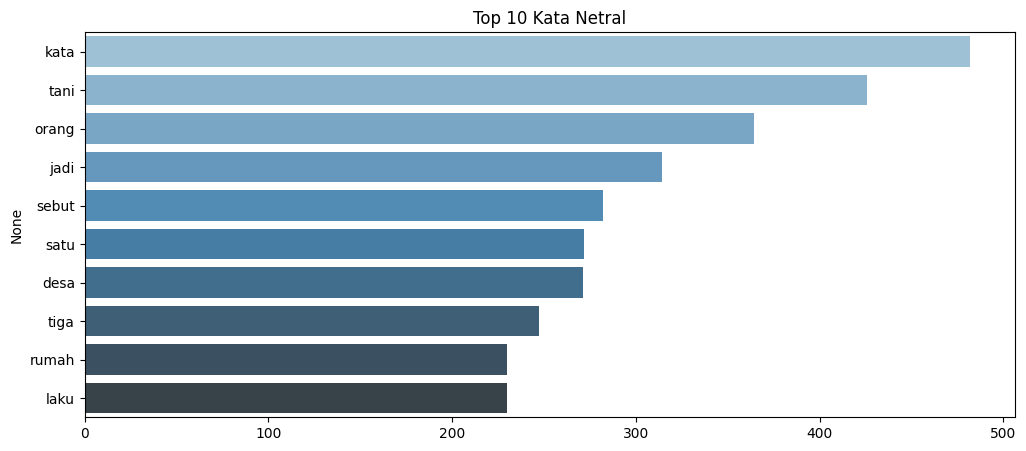

In [52]:
plt.figure(figsize=(12, 5))
spam_data = top_words(df[df['sentiment'] == 0]['clean_kalimat'], 10)
sns.barplot(x=spam_data.values, y=spam_data.index, hue=spam_data.index, palette='Blues_d', legend=False)
plt.title('Top 10 Kata Netral')

Text(0.5, 1.0, 'Top 10 Kata Positif')

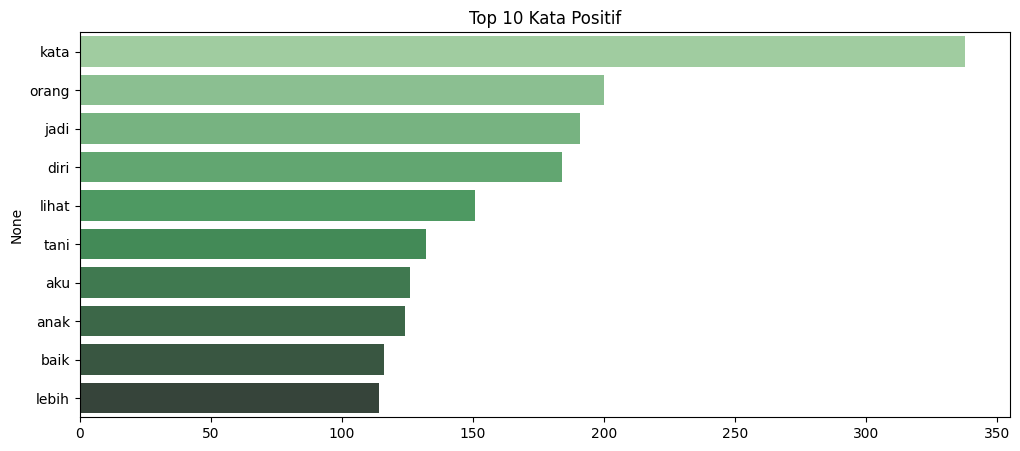

In [53]:
plt.figure(figsize=(12, 5))
spam_data = top_words(df[df['sentiment'] == 1]['clean_kalimat'], 10)
sns.barplot(x=spam_data.values, y=spam_data.index, hue=spam_data.index, palette='Greens_d', legend=False)
plt.title('Top 10 Kata Positif')

Text(0.5, 1.0, 'Top 10 Kata Negatif')

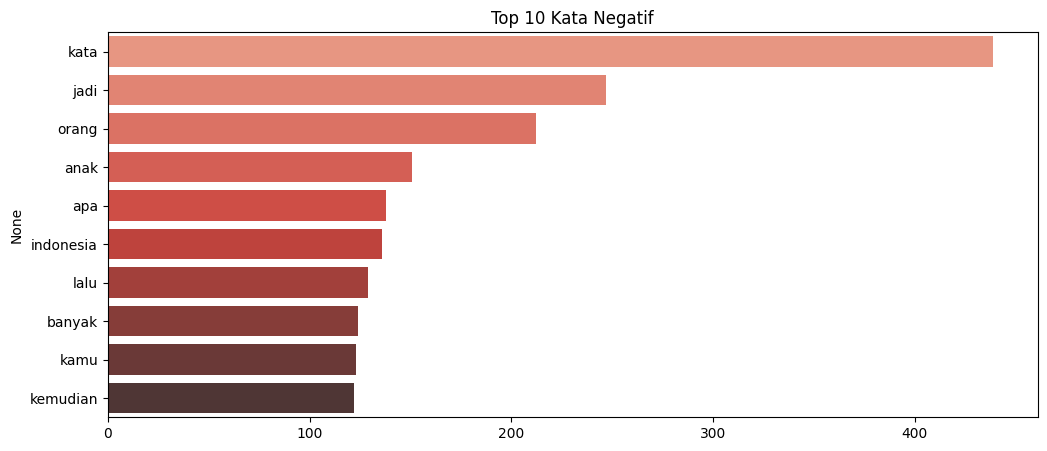

In [54]:
plt.figure(figsize=(12, 5))
spam_data = top_words(df[df['sentiment'] == 2]['clean_kalimat'], 10)
sns.barplot(x=spam_data.values, y=spam_data.index, hue=spam_data.index, palette='Reds_d', legend=False)
plt.title('Top 10 Kata Negatif')

## D. Modelling

### D.1 Defining X (Feature) and y (Target) Variables

In [55]:
X_data = df['clean_kalimat']
y_data = df['sentiment']

### E.2 Splitting Data Training and Data Testing (80:20)

In [56]:
def stratified_split(X_data, y_data, train_size=0.8, random_state=42, frac=None):
    np.random.seed(random_state)
    
    if frac:
        X_data = X_data.sample(frac=frac, random_state=random_state)
        y_data = y_data.loc[X_data.index]
        
    X_train_list, X_test_list = [],[]
    y_train_list, y_test_list = [],[]
    
    for class_value in np.unique(y_data):
        class_idx = np.where(y_data==class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        X_train_list.append(X_data.iloc[idx[:split_ratio]])
        X_test_list.append(X_data.iloc[idx[split_ratio:]])
        y_train_list.append(y_data.iloc[idx[:split_ratio]])
        y_test_list.append(y_data.iloc[idx[split_ratio:]])
        
    X_train = pd.concat(X_train_list).reset_index(drop=True)
    X_test = pd.concat(X_test_list).reset_index(drop=True)
    y_train = pd.concat(y_train_list).reset_index(drop=True)
    y_test = pd.concat(y_test_list).reset_index(drop=True)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = stratified_split(X_data, y_data)

### E.3 Resampling Train Data

In [57]:
train_data = pd.DataFrame({'kalimat': X_train, 'sentiment': y_train})

major_label = train_data[train_data['sentiment'] == 0]
normal_label = train_data[train_data['sentiment'] == 1]
minor_label = train_data[train_data['sentiment'] == 2]

target_label = len(major_label)

normal_label_oversampled = normal_label.sample(n=target_label, replace=True, random_state=42)
minor_label_oversampled = minor_label.sample(n=target_label, replace=True, random_state=42)

train_balanced = pd.concat([major_label, normal_label_oversampled, minor_label_oversampled])
train_balanced.shape
train_balanced['sentiment'].value_counts()

sentiment
0    4474
1    4474
2    4474
Name: count, dtype: int64

### E.4 Defining Balanced X (Feature) and y (Target) Variables

In [58]:
X_train_clean = preprocess_text(train_balanced['kalimat'])
X_test_clean = preprocess_text(X_test)

y_train = train_balanced['sentiment'].values
y_test = y_test.values

### E.5 TF - IDF Formulas

#### Membangun Kamus/Vocabulary

In [59]:
# Di fungsi build_vocabulary atau sebelumnya
def build_vocabulary_limited(text_series, max_features=1000):
    all_text = " ".join(text_series)
    word_counts = pd.Series(all_text.split()).value_counts()
    
    # Ambil 1000 kata terbanyak saja
    top_words = word_counts.head(max_features).index.tolist()
    
    vocab_index = {word: i for i, word in enumerate(sorted(top_words))}
    return vocab_index

#### Menghitung TF (Term Frequency)

In [60]:
def calculate_tf(text_series, vocab_index):
    n_docs = len(text_series)
    n_vocab = len(vocab_index)
    
    # Matriks Kosong untuk TF
    tf_matrix = np.zeros((n_docs, n_vocab))
    
    for row, text in enumerate(text_series):
        words = text.split()
        for w in words:
            # Jika kata ada di kamus, tambahkan hitungannya (+1)
            if w in vocab_index:
                col_idx = vocab_index[w]
                tf_matrix[row, col_idx] += 1
                
    return tf_matrix

#### Menghitung IDF (Inverse Document Frequency)

In [61]:
def calculate_idf(text_series, vocab_index):
    n_docs = len(text_series)
    vocab_list = list(vocab_index.keys())
    
    # Hitung DF (Document Frequency)
    df_counts = dict.fromkeys(vocab_list, 0)
    for text in text_series:
        unique_words_in_sms = set(text.split()) # Kata unik per SMS
        for word in unique_words_in_sms:
            if word in df_counts:
                df_counts[word] += 1
    
    # Hitung Rumus IDF
    idf_values = {}
    for word, count in df_counts.items():
        # Rumus: log(Total Dokumen / (Jumlah Dokumen yg punya kata itu + 1))
        idf_values[word] = np.log(n_docs / (count + 1))
        
    return idf_values

#### Menghitung TF-IDF

In [62]:
def multiply_tf_idf(tf_matrix, vocab_index, idf_values):
    # Kita copy dulu matriks TF biar aslinya gak berubah
    tfidf_matrix = tf_matrix.copy()
    
    # Ambil jumlah baris dan kolom
    n_docs, n_vocab = tfidf_matrix.shape
    
    # Lakukan Perkalian: TF * IDF
    # Kita loop per kolom (per kata)
    for word, col_idx in vocab_index.items():
        idf_score = idf_values[word]
        
        # Kalikan seluruh kolom tersebut dengan nilai IDF-nya
        # (Kolom 'aku' dikali skor IDF 'aku', dst)
        tfidf_matrix[:, col_idx] = tfidf_matrix[:, col_idx] * idf_score
        
    return tfidf_matrix

#### Menjalankan Semua Methods TF-IDF + Normalisasi

In [63]:
def normalize_l2(matrix):
    norms = np.sqrt(np.sum(matrix**2, axis=1, keepdims=True))
    norms[norms == 0] = 1
    return matrix / norms

In [64]:
# 1. Bikin Kamus
vocab_index = build_vocabulary_limited(X_train_clean, max_features=500)

# 2. Hitung IDF
idf_values = calculate_idf(X_train_clean, vocab_index)

# 3. Hitung TF Train & Test
tf_train = calculate_tf(X_train_clean, vocab_index)
tf_test = calculate_tf(X_test, vocab_index)

# 4. Kalikan jadi TF-IDF Train & TF-IDF Test
X_train_matrix = multiply_tf_idf(tf_train, vocab_index, idf_values)
X_test_matrix = multiply_tf_idf(tf_test, vocab_index, idf_values)

X_train_matrix = normalize_l2(X_train_matrix)
X_test_matrix = normalize_l2(X_test_matrix)

print(f"Dimensi Train: {X_train_matrix.shape}")
print(f"Dimensi Test : {X_test_matrix.shape}")

Dimensi Train: (13422, 500)
Dimensi Test : (2220, 500)


### E.6 Decision Tree Formulas

#### Menghitung Gini Impurity

In [65]:
def hitung_gini(groups, classes):
    n_instances = float(sum([len(group) for group in groups]))
    gini = 0.0
    
    for group in groups:
        size = float(len(group))
        if size == 0:
            continue
        
        score = 0.0
        
        group_y = group.iloc[:, -1]
        
        for class_val in classes:
            p = (group_y == class_val).sum() / size
            score += p ** 2
            
        gini += (1.0 - score) * (size / n_instances)
        
    return gini

#### Melakukan Splitting Data

In [66]:
def split_data(df, feat_idx, threshold):
    
    left = df[df.iloc[:, feat_idx] < threshold]
    right = df[df.iloc[:, feat_idx] >= threshold]
    
    return left, right

#### Mencari Best Split

In [67]:
def get_best_split(df, classes):
    best_gini = float('inf')
    best_split = {}
    n_features = df.shape[1] - 1
    
    for feat_idx in range(n_features):
        for index, row in df.iterrows():
            groups = split_data(df, feat_idx, row.iloc[feat_idx])
            gini = hitung_gini(groups, classes)
            
            if gini < best_gini:
                best_gini = gini
                best_split = {
                    'feat_idx' : feat_idx,
                    'val' : row.iloc[feat_idx],
                    'groups' : groups
                }
    return best_split

#### Membangun Pohon (Recursive)

In [68]:
def to_terminal(group):
    return group.iloc[:, -1].mode()[0]

def build_tree(df, classes, depth, max_depth):
    root = get_best_split(df, classes)
    if not root: 
        return to_terminal(df)

    left, right = root['groups']
    del(root['groups'])
    
    if len(left) == 0 or len(right) == 0:
        no_split_data = pd.concat([left, right])
        root['left'] = root['right'] = to_terminal(no_split_data)
        return root
    
    if depth >= max_depth:
        root['left'] = to_terminal(left)
        root['right'] = to_terminal(right)
        return root

    root['left'] = build_tree(left, classes, depth + 1, max_depth)
    root['right'] = build_tree(right, classes, depth + 1, max_depth)
    
    return root

#### Prediksi

In [69]:
def predict_row(node, row):
    if not isinstance(node, dict):
        return node
    
    if row.iloc[node['feat_idx']] < node['val']:
        return predict_row(node['left'], row)
    else:
        return predict_row(node['right'], row)

def predict_batch(tree, df_test):
    predictions = []
    for index, row in df_test.iterrows():
        prediction = predict_row(tree, row)
        predictions.append(prediction)
    return predictions

## F. Evaluasi

### F.1 Memprediksi Hasil

In [ ]:
# Persiapan Data (Gabungkan X_train dan y_train)
y_train_series = pd.Series(y_train)
train_data = pd.concat([pd.DataFrame(X_train_matrix), y_train_series], axis=1)

# Ambil daftar kelas unik (0.0, 1.0, 2. 0)
unique_classes = y_train_series.unique()

# Membangun Pohon
my_tree = build_tree(train_data, unique_classes, depth=0, max_depth=3)

# Memprediksi
X_test_df = pd.DataFrame(X_test_matrix)
predictions = predict_batch(my_tree, X_test_df)